Implementation of Load Forecasting(Day) using **Linear Regression Model** between **Temperature** and **Load** on Day Data 

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import io

In [40]:
from google.colab import files
uploaded = files.upload()

Saving regression_data.xls to regression_data.xls


In [55]:
dataset = pd.read_excel(io.BytesIO(uploaded['regression_data.xls']))

In [56]:
dataset

,Temperature,load
0,26,1111679
1,25,1099322
2,24,941845
3,25,842432
4,26,1093056
...,...,...
724,26,895067
725,26,1145349
726,24,1135321
727,25,1145212


In [57]:
data=dataset.values


In [58]:
temperature=data[:,:1]
load=data[:,1:]

In [59]:
xtrain = temperature[:-150]
xtest = temperature[-150:]

# Split the targets into training/testing sets
ytrain = load[:-150]
ytest = load[-150:]

In [60]:
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(xtrain, ytrain)

# Make predictions using the testing set
y_pred = regr.predict(xtest)      #predicted load

In [61]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [[22641.04556785]]


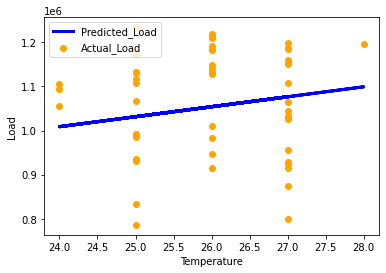

In [62]:
plt.scatter(xtest[:50], ytest[:50],  color='orange', label='Actual_Load')
plt.plot(xtest[:50], y_pred[:50], color='blue', linewidth=3, label='Predicted_Load')
plt.legend(loc='upper left')
plt.xlabel("Temperature")
plt.ylabel("Load")

plt.show()

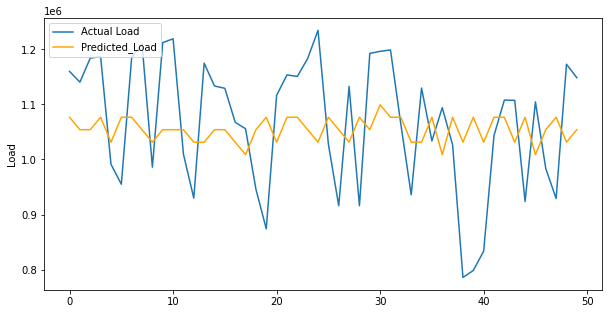

In [67]:
plt.figure(figsize=(10,5))
plt.plot(ytest[0:50], label='Actual Load')
plt.plot(y_pred[0:50], label='Predicted_Load', color='orange')
plt.legend(loc='upper left')
plt.ylabel("Load")
plt.show()

In [64]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape1=mean_absolute_percentage_error(ytest, y_pred)
print("Mean Absolute Error Percentage in Linear Regression Model is ", round(mape1,2),"%")
print()

Mean Absolute Error Percentage in Linear Regression Model is  9.96 %

